<a href="https://colab.research.google.com/github/Sanchita210507/BML-Experiments/blob/main/Experiment_9_K_Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Experiment 9: Build the K-means clustering model on market segmentation dataset.**

***Dataset Used: Bank Marketing Dataset***

*Step 1: Load and prepare the dataset.*

In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/bank_marketing/bank/bank.csv'
df = pd.read_csv(file_path, sep=';')

# Select two numeric features
X = df[['age', 'balance']].values

# Encode target (yes=1, no=0)
le = LabelEncoder()
y = le.fit_transform(df['y'])

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


*Step 2: Manual Implementation*

Accuracy Score using manual implentation: 88.48%


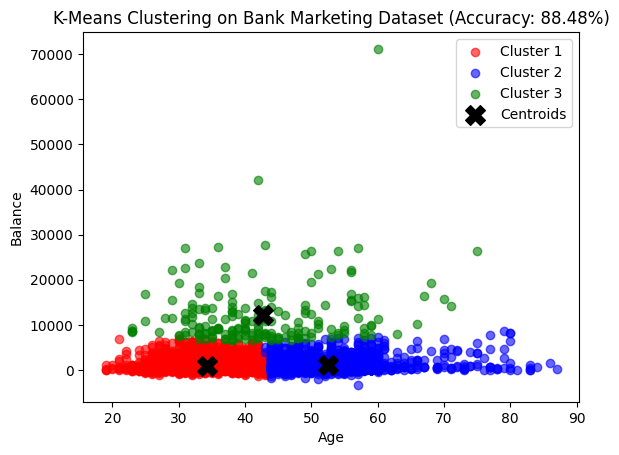

In [ ]:
from sklearn.preprocessing import StandardScaler

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Use X_scaled for K-Means
model = KMeans(n_clusters=3, random_state=42)
clusters = model.fit_predict(X_scaled)

# Map clusters to labels as before
cluster_to_label = {}
for cluster_id in range(3):
    labels_in_cluster = y[clusters == cluster_id]
    if len(labels_in_cluster) == 0:
        majority_label = -1
    else:
        majority_label = np.bincount(labels_in_cluster).argmax()
    cluster_to_label[cluster_id] = majority_label

predicted_labels = np.array([cluster_to_label[c] for c in clusters])
accuracy = accuracy_score(y, predicted_labels)
print(f"Accuracy Score using manual implentation: {accuracy * 100:.2f}%")

# Plot clusters (inverse-transform for visual clarity)
X_plot = scaler.inverse_transform(X_scaled)  # revert back to original scale for plotting
colors = ['red', 'blue', 'green']
for cluster_id in range(3):
    plt.scatter(X_plot[clusters == cluster_id, 0],
                X_plot[clusters == cluster_id, 1],
                c=colors[cluster_id],
                label=f'Cluster {cluster_id+1}',
                alpha=0.6)

plt.scatter(scaler.inverse_transform(model.cluster_centers_)[:, 0],
            scaler.inverse_transform(model.cluster_centers_)[:, 1],
            marker='X', c='black', s=200, label='Centroids')

plt.xlabel('Age')
plt.ylabel('Balance')
plt.title(f'K-Means Clustering on Bank Marketing Dataset (Accuracy: {accuracy * 100:.2f}%)')
plt.legend()
plt.show()


*Step 3: Built-in Method*

Accuracy Score using built-in method: 88.48%


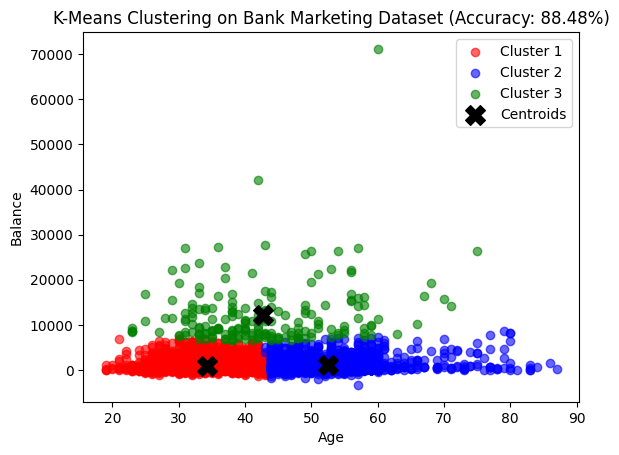

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

# Predict clusters
clusters = kmeans.predict(X_scaled)

# Map clusters to labels automatically
from scipy.stats import mode

cluster_labels = np.zeros_like(clusters)
for i in range(3):
    mask = (clusters == i)
    if mask.any():
        cluster_labels[mask] = mode(y[mask])[0]

# Accuracy
accuracy = accuracy_score(y, cluster_labels)
print(f"Accuracy Score using built-in method: {accuracy * 100:.2f}%")

# Plot clusters (inverse-transform for visual clarity)
X_plot = scaler.inverse_transform(X_scaled)
colors = ['red', 'blue', 'green']

for i in range(3):
    plt.scatter(X_plot[clusters == i, 0],
                X_plot[clusters == i, 1],
                c=colors[i],
                label=f'Cluster {i+1}',
                alpha=0.6)

# Plot centroids
centroids_plot = scaler.inverse_transform(kmeans.cluster_centers_)
plt.scatter(centroids_plot[:, 0],
            centroids_plot[:, 1],
            marker='X', c='black', s=200, label='Centroids')

plt.xlabel('Age')
plt.ylabel('Balance')
plt.title(f'K-Means Clustering on Bank Marketing Dataset (Accuracy: {accuracy * 100:.2f}%)')
plt.legend()
plt.show()
